In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [20]:
df = pd.read_csv("config_output_updated_reward/output.csv", index_col=False)

C:\Users\duanh\AppData\Local\Temp/ipykernel_5196/1718875475.py:1: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv("config_output_updated_reward/output.csv", index_col=False)


In [21]:
df = df.dropna()
df.head()

,Sim,Time step,Color,X,Y,Reward,Move,Color.1,X.1,Y.1,Reward.1,Move.1,
0,1,1,green,1.0,5.0,0.0,Go,red,5.0,1.0,0.0,Go,
1,1,2,green,2.0,5.0,-2.0,Go,red,5.0,2.0,-2.0,Go,
2,1,3,green,3.0,5.0,-4.0,Go,red,5.0,3.0,-4.0,Go,
3,1,4,green,4.0,5.0,-6.0,Stop,red,5.0,4.0,-6.0,Stop,
4,1,5,green,4.0,5.0,-8.0,Stop,red,5.0,4.0,-8.0,Stop,


In [22]:
df = df.dropna()

In [23]:
np.mean(red_stop)

0.2

In [24]:
green_early_stop = [0]*50
green_stop = [0]*50
red_early_stop = [0]*50
red_stop = [0]*50
crashed_sim = list()
green_reward = list()
red_reward = list()
for i in range(len(df)):
    sim = df['Sim'].to_list()[i] - 1
    if df[' Move'].to_list()[i] == ' Crashed':
        crashed_sim.append(sim)
    if df[' X'].to_list()[i] != 4:
        if df[' Move'].to_list()[i] == ' Stop':
            green_early_stop[sim] += 1
    else:
        if df[' Move'].to_list()[i] == ' Stop':
            green_stop[sim] += 1 
            
    if df[' Move'].to_list()[i] == ' Crashed' or df[' Move'].to_list()[i] == ' Exited':
        green_reward.append(df[' Reward'].to_list()[i])
    if df[' Move.1'].to_list()[i] == ' Crashed' or df[' Move.1'].to_list()[i] == ' Exited':
        red_reward.append(df[' Reward.1'].to_list()[i])
    
    
    if df[' Y.1'].to_list()[i] != 4:
        if df[' Move.1'].to_list()[i] == ' Stop':
            red_early_stop[sim] += 1
    else:
        if df[' Move.1'].to_list()[i] == ' Stop':
            red_stop[sim] += 1 

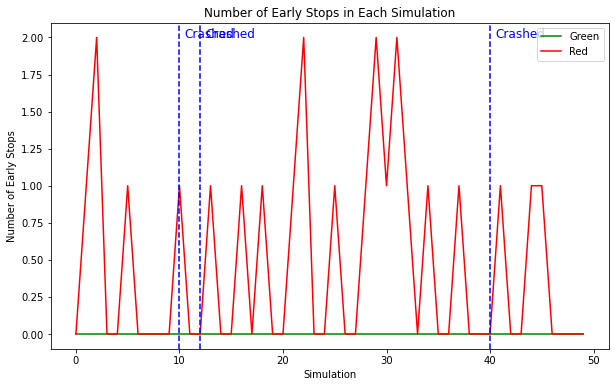

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(green_early_stop, color='green', label='Green')
plt.plot(red_early_stop, color='red', label='Red')
for x in crashed_sim:
    plt.axvline(x=x, linestyle='--', color='blue')
    plt.text(x+0.5, max(max(green_early_stop), max(red_early_stop)), 'Crashed', color='blue', fontsize=12)

# Adding labels and legend
plt.xlabel('Simulation')
plt.ylabel('Number of Early Stops')
plt.title('Number of Early Stops in Each Simulation')
plt.legend()

# Show plot
plt.show()

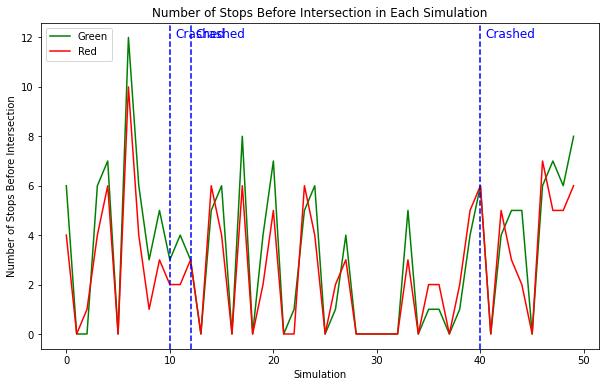

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(green_stop, color='green', label='Green')
plt.plot(red_stop, color='red', label='Red')
for x in crashed_sim:
    plt.axvline(x=x, linestyle='--', color='blue')
    plt.text(x+0.5, max(max(green_stop), max(red_stop)), 'Crashed', color='blue', fontsize=12)

# Adding labels and legend
plt.xlabel('Simulation')
plt.ylabel('Number of Stops Before Intersection')
plt.title('Number of Stops Before Intersection in Each Simulation')
plt.legend(loc='upper left')

# Show plot
plt.show()

In [ ]:
# Early stop(not in 4,5 or 5,4)
# Stop before intersection(in 4,5 or 5,4)

# Success rate
# Cumulative reward after each simulation

# With bg
# Success rate

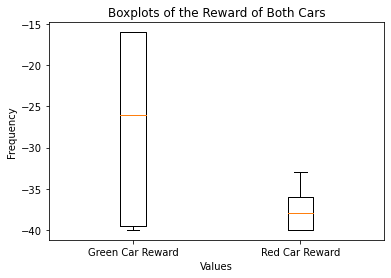

In [77]:
plt.boxplot([green_reward, red_reward], labels=['Green Car Reward', 'Red Car Reward'])

# Adding labels and legend
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Boxplots of the Reward of Both Cars')

# Show plot
plt.show()

In [33]:
np.mean(red_stop), np.mean(red_early_stop)

(2.62, 0.48)

In [34]:
np.mean(green_stop), np.mean(green_early_stop)

(3.22, 0.0)